In [ ]:
!pip install sweetviz
!pip install --upgrade mlxtend

     |████████████████████████████████| 15.1 MB 140 kB/s 
     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import missingno as msno
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor   

sns.set()

In [4]:
df_train = pd.read_csv("train.csv")

In [35]:
df_train.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [62]:
df_train['Months since last delinquent'].unique()

array([ nan,  73.,  18.,   6.,  40.,  44.,  45.,  17.,  61.,  14.,  11.,
        32.,  75.,  65.,  10.,  28.,  35.,  29.,  13.,   8.,  71.,  54.,
        21.,  68.,  51.,  70.,  19.,  22.,  16.,  38.,  36.,   0.,  34.,
        30.,   3.,  52.,  72.,  63.,  23.,   5.,  60.,  59.,   1.,  74.,
         4.,  42.,  39.,  41.,  55.,  67.,  37.,  47.,  26.,  76.,  43.,
        12.,   7.,  77.,  48.,  79.,  80.,  31.,  64.,  78.,  20.,  58.,
        49.,   9.,  69.,  25.,  33.,  15.,  57.,  86.,  62.,   2.,  24.,
        56.,  82.,  66.,  46.,  27.,  50.,  53.,  81.,  83., 118.,  84.,
        91.,  92.])

In [ ]:
pd_trainData_eda = sv.analyze(df_train,target_feat='Credit Default')

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
pd_trainData_eda.show_html("Credit Risk Data_EDA.html")

Report Credit Risk Data_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [ ]:
df_train.describe()

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


## Handling Missing Values

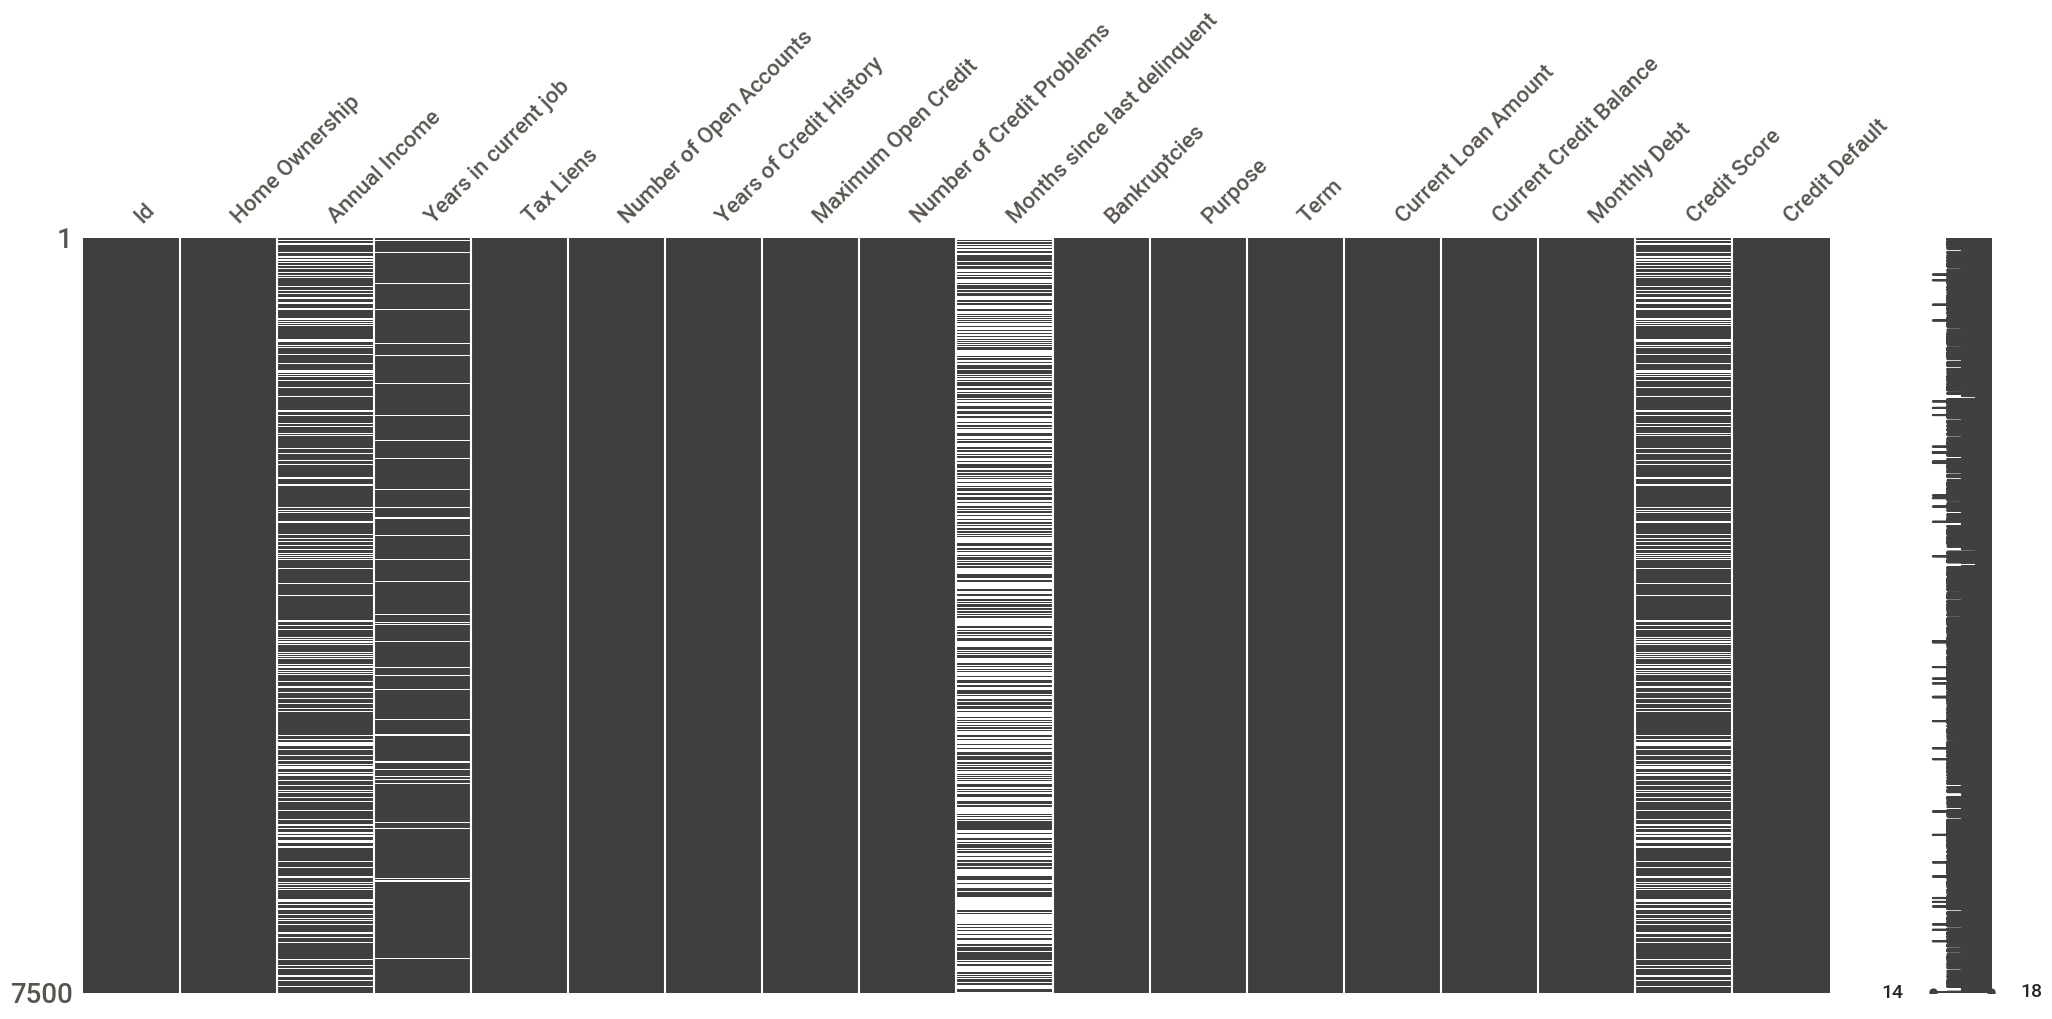

In [ ]:
msno.matrix(df_train)

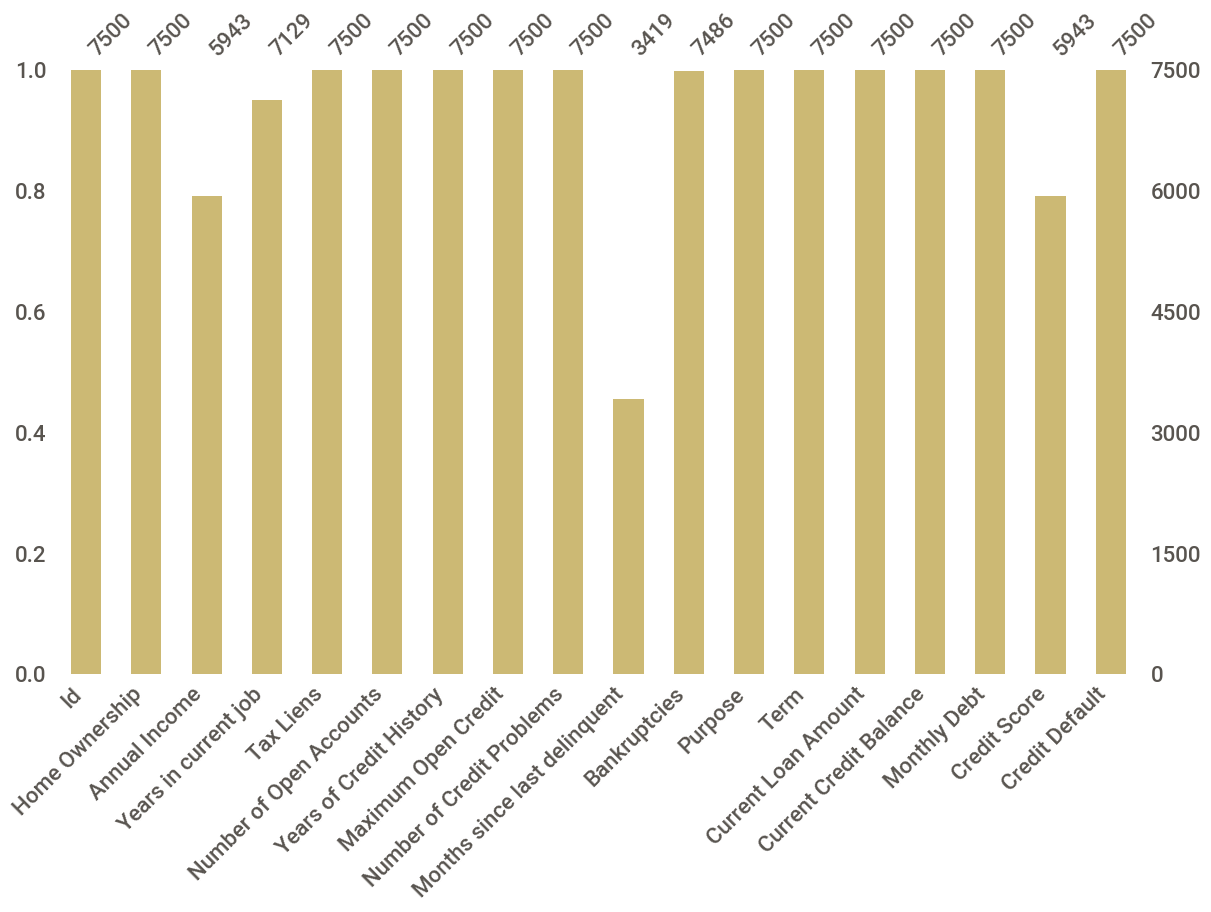

In [ ]:
msno.bar(df_train,  color = 'y', figsize = (14,8));

In [ ]:
for col in df_train.columns:
    prct = np.mean(df_train[col].isnull())
    print('{}:{}%'.format(col, round(prct*100)))

Id:0%
Home Ownership:0%
Annual Income:21%
Years in current job:5%
Tax Liens:0%
Number of Open Accounts:0%
Years of Credit History:0%
Maximum Open Credit:0%
Number of Credit Problems:0%
Months since last delinquent:54%
Bankruptcies:0%
Purpose:0%
Term:0%
Current Loan Amount:0%
Current Credit Balance:0%
Monthly Debt:0%
Credit Score:21%
Credit Default:0%


In [ ]:
ann_inc_boxPlot_fig = px.box(df_train, y='Annual Income')
ann_inc_boxPlot_fig.show()

In [ ]:
mnths_sns_last_dlnqcy_fig = px.box(df_train, y='Months since last delinquent')
mnths_sns_last_dlnqcy_fig.show()

In [ ]:
crdt_score_fig = px.box(df_train, y='Credit Score')
crdt_score_fig.show()

In [5]:
def fill_missing_values(df:pd.DataFrame) -> pd.DataFrame:
  df = df.copy()

  df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
  df['Years in current job'] = df['Years in current job'].fillna("unknown")
  df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean())
  df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
  df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

  return df

In [6]:
df_train_clean = fill_missing_values(df_train)

## Handling Categorical Features

In [7]:
def handle_yrs_in_crrnt_job(years:pd.Series) -> pd.Series:
  years_in_current_job_dict = {
    'unknown':0,
    '< 1 year':1,
    '1 year':2,
    '2 years':3,
    '3 years':4,
    '4 years':5,
    '5 years':6,
    '6 years':7,
    '7 years':8,
    '8 years':9,
    '9 years':10,
    '10+ years':11

  }
  return years.map(years_in_current_job_dict)

def handle_Term(term:pd.Series) -> pd.Series:
  term_dict = {
    'Short Term':0,
    'Long Term':1
      }
  return term.map(term_dict)


In [8]:
df_train_clean['Years in current job'] = handle_yrs_in_crrnt_job(df_train_clean['Years in current job'])
df_train_clean['Term'] = handle_Term(df_train_clean['Term'])

In [ ]:
df_train_clean.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,34.6926,1.0,debt consolidation,0,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,11,0.0,15.0,15.3,1181730.0,0.0,34.6926,0.0,debt consolidation,1,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,9,0.0,11.0,35.0,1182434.0,0.0,34.6926,0.0,debt consolidation,0,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,7,0.0,8.0,22.5,147400.0,1.0,34.6926,1.0,debt consolidation,0,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,9,0.0,13.0,13.6,385836.0,1.0,34.6926,0.0,debt consolidation,0,125840.0,93309.0,7180.0,719.0,0


In [9]:
categorical_columns = df_train_clean.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_train_clean.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove('Id')
continous_variables = []
for col in numerical_columns:
  if len(df_train_clean[col].value_counts().to_list())>50:
    continous_variables.append(col)
'''load_data_dummies = [
    
    pd.get_dummies(df_train_clean[cat_col],prefix=cat_col,prefix_sep=':') for cat_col in categorical_columns
    
]

load_data_dummies = pd.concat(load_data_dummies,axis=1)

load_data_dummies.head()'''

"load_data_dummies = [\n    \n    pd.get_dummies(df_train_clean[cat_col],prefix=cat_col,prefix_sep=':') for cat_col in categorical_columns\n    \n]\n\nload_data_dummies = pd.concat(load_data_dummies,axis=1)\n\nload_data_dummies.head()"

In [ ]:
'''df_train_clean = pd.concat([df_train_clean,load_data_dummies],axis=1).drop(categorical_columns,axis=1).set_index('Id')
df_train_clean.head()'''

"df_train_clean = pd.concat([df_train_clean,load_data_dummies],axis=1).drop(categorical_columns,axis=1).set_index('Id')\ndf_train_clean.head()"

## Checking Muli-Collinearity

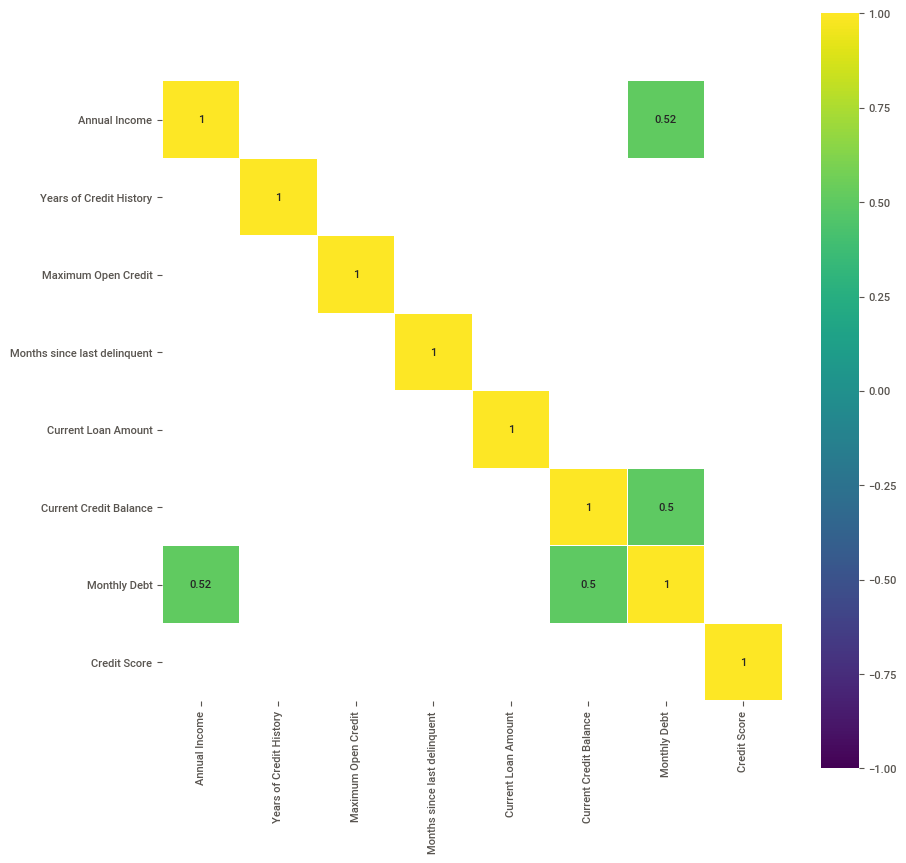

In [ ]:
# Correlation between Numerical Columns using pearson coefficient of correlation
corr = df_train_clean[continous_variables].corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train_clean[continous_variables].values, i) for i in range(df_train_clean[continous_variables].shape[1])]
vif["features"] = df_train_clean[continous_variables].columns
vif

,VIF Factor,features
0,5.276514,Annual Income
1,5.681368,Years of Credit History
2,1.013213,Maximum Open Credit
3,4.189974,Months since last delinquent
4,1.142548,Current Loan Amount
5,2.546659,Current Credit Balance
6,5.419392,Monthly Debt
7,1.494386,Credit Score


## Handling Outliers

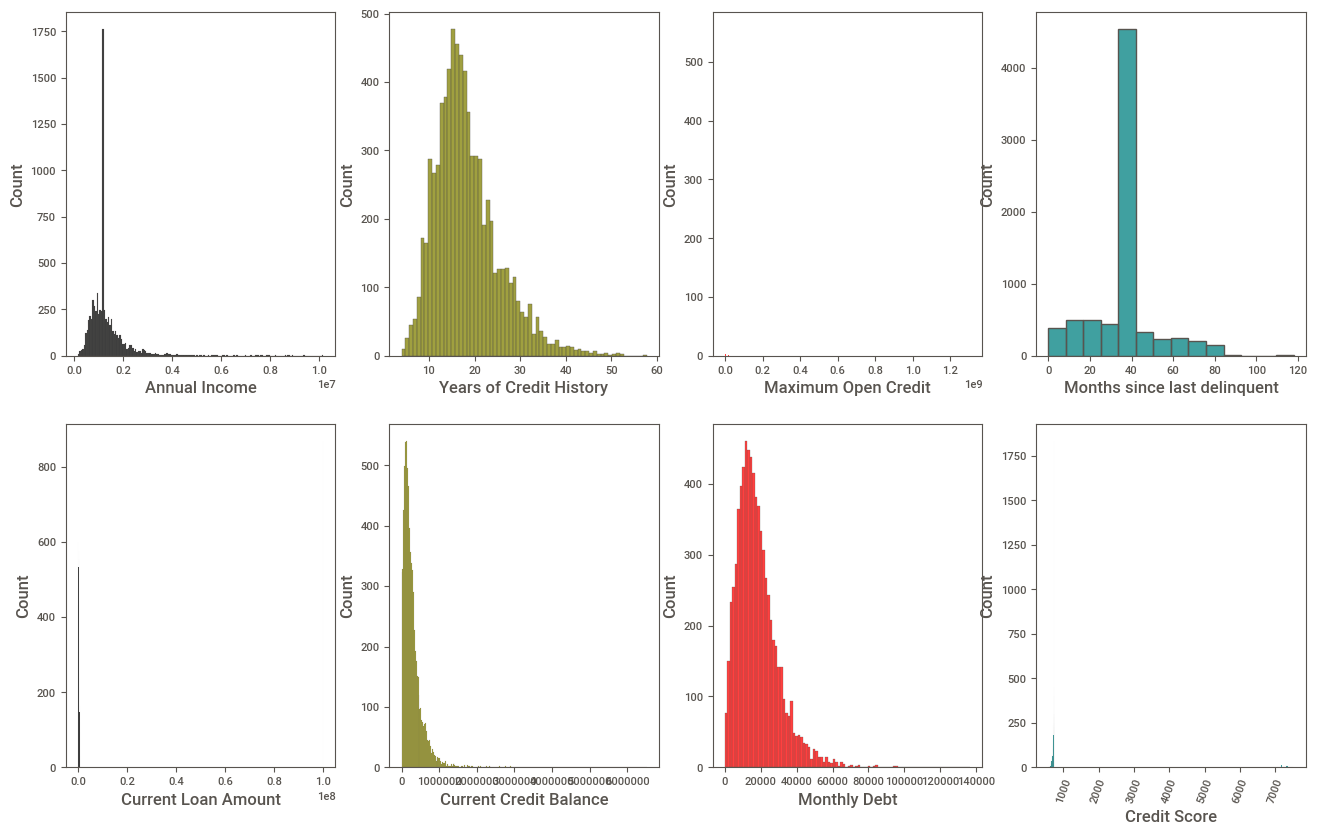

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))
plt.xticks(rotation=70)

sns.histplot(data=df_train_clean, x='Annual Income', kde=False, color="black", ax=axs[0, 0])

sns.histplot(data=df_train_clean, x='Years of Credit History', kde=False, color="olive", ax=axs[0, 1])

sns.histplot(data=df_train_clean, x='Maximum Open Credit', kde=False, color="red", ax=axs[0, 2])

sns.histplot(data=df_train_clean, x='Months since last delinquent', kde=False, color="teal", ax=axs[0, 3])


sns.histplot(data=df_train_clean, x='Current Loan Amount', kde=False, color="black", ax=axs[1, 0])

sns.histplot(data=df_train_clean, x='Current Credit Balance', kde=False, color="olive", ax=axs[1, 1])

sns.histplot(data=df_train_clean, x='Monthly Debt', kde=False, color="red", ax=axs[1, 2])

sns.histplot(data=df_train_clean, x='Credit Score', kde=False, color="teal", ax=axs[1, 3])

plt.show()

In [10]:
def show_outliers(variable, dataframe,verbose=True):
  q1 = dataframe[variable].quantile(0.25)
  q3 = dataframe[variable].quantile(0.75)
  IQR = q3 - q1
  outliers = dataframe[variable][(dataframe[variable]<(q1-1.5*IQR)) | (dataframe[variable]>(q3+1.5*IQR))]
  inliers = dataframe[variable][~((dataframe[variable]<(q1-1.5*IQR)) | (dataframe[variable]>(q3+1.5*IQR)))]
  if verbose:
    print("{}: {}% are outliers and {}% are inliers".format(variable,round(len(outliers)/len(dataframe)*100,3),round(len(inliers)/len(dataframe)*100),3))
    return None
  else:
    percentage_inliers = round(len(inliers)/len(dataframe)*100,3)
    percentage_outliers = round(len(outliers)/len(dataframe)*100,3)
    return (percentage_inliers,percentage_outliers)

In [11]:
for variable in continous_variables:
  show_outliers(variable,df_train_clean)

Annual Income: 6.88% are outliers and 93% are inliers
Years of Credit History: 3.04% are outliers and 97% are inliers
Maximum Open Credit: 6.213% are outliers and 94% are inliers
Months since last delinquent: 45.587% are outliers and 54% are inliers
Current Loan Amount: 11.6% are outliers and 88% are inliers
Current Credit Balance: 5.867% are outliers and 94% are inliers
Monthly Debt: 3.4% are outliers and 97% are inliers
Credit Score: 13.373% are outliers and 87% are inliers


In [12]:
# Removing outliers which are less than 10%
def remove_outliers(variables:list, df:pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  for column in variables:
    _,percentage_outliers = show_outliers(column,df,verbose=False)
    if percentage_outliers<10 or column=='Current Loan Amount':
      print("Removing outliers from Column: {}".format(column))
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      IQR = q3 - q1
      outliers = df[column][(df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR))]
      ids = outliers.index
      df.drop(ids,inplace=True)

  return df

In [13]:
df_train_clean = remove_outliers(continous_variables,df_train_clean)

Removing outliers from Column: Annual Income
Removing outliers from Column: Years of Credit History
Removing outliers from Column: Maximum Open Credit
Removing outliers from Column: Current Loan Amount
Removing outliers from Column: Current Credit Balance
Removing outliers from Column: Monthly Debt


In [22]:
# replacing credit scores greater than 900, by 900 as it is impossible to have credit score greater than 900
df_train_clean['Credit Score'].where(df_train_clean['Credit Score']<900,900,inplace=True)

In [18]:
df_train_clean.set_index("Id",inplace=True)
df_train_clean.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Id,,,,,,,,,,,,,,,,,
1,Own Home,1025487.0,11,0.0,15.0,15.3,1181730.0,0.0,34.6926,0.0,debt consolidation,1,264968.0,394972.0,18373.0,737.0,1
3,Own Home,805068.0,7,0.0,8.0,22.5,147400.0,1.0,34.6926,1.0,debt consolidation,0,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,9,0.0,13.0,13.6,385836.0,1.0,34.6926,0.0,debt consolidation,0,125840.0,93309.0,7180.0,719.0,0
5,Rent,1168386.0,8,0.0,12.0,14.6,366784.0,0.0,34.6926,0.0,other,1,337304.0,165680.0,18692.0,731.0,1
7,Rent,1040060.0,11,0.0,13.0,12.0,330374.0,0.0,18.0000,0.0,other,0,250888.0,89015.0,19761.0,705.0,1


In [26]:
df_train_clean.to_csv("Pre-processed Data.csv")

## Split Data into Training and Validation set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train_clean = pd.read_csv("Pre-processed Data.csv")

In [29]:
X = df_train_clean.drop('Credit Default',axis=1)
y = df_train_clean['Credit Default'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

Text(0.5, 0.98, 'Proportion of Non-Defaulters and Defaulters [Train Data]')

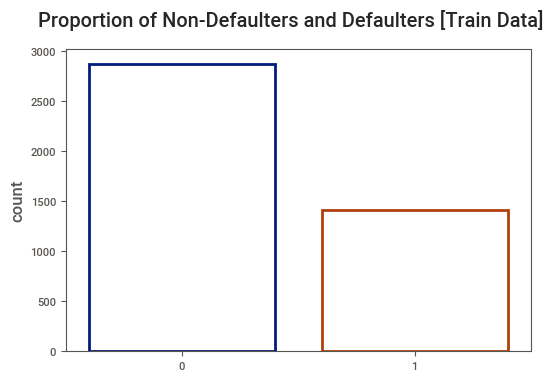

In [ ]:
fig = sns.countplot(x=y_train,facecolor=(0, 0, 0, 0),
                   linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))
fig.figure.suptitle("Proportion of Non-Defaulters and Defaulters [Train Data]")

Text(0.5, 0.98, 'Proportion of Non-Defaulters and Defaulters [Validation Data]')

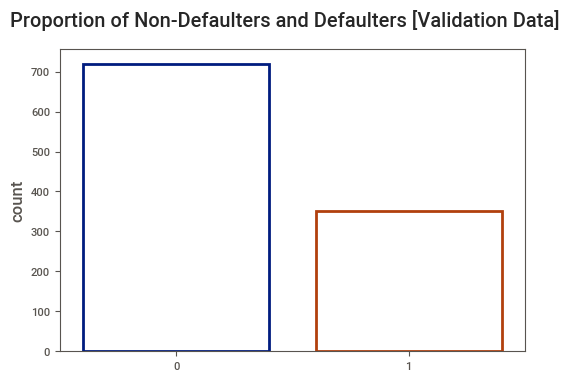

In [ ]:
fig = sns.countplot(x=y_test,facecolor=(0, 0, 0, 0),
                   linewidth=2,
                   edgecolor=sns.color_palette("dark", 3))
fig.figure.suptitle("Proportion of Non-Defaulters and Defaulters [Validation Data]")

## Modelling Data

### Using Logistic Regression

In [ ]:
!pip install sklearn_pandas

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import roc_curve

In [34]:
continous_variables

['Annual Income',
 'Years of Credit History',
 'Maximum Open Credit',
 'Months since last delinquent',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [32]:
mapper = DataFrameMapper(
  [(continous_variables, StandardScaler())] + \
  [(cat_var, LabelBinarizer()) for cat_var in ['Home Ownership','Purpose']]
)


In [33]:
mapper.fit_transform(X_train)

array([[-0.74876141,  0.10624569,  0.26626874, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09115327, -1.37726581, -1.49550812, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09115327, -1.79126901, -1.19769123, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.22574974, -0.37675805, -0.8652516 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.03268717,  0.48574863, -0.30079361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.20676477, -0.39400819, -1.09880193, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
mapper = DataFrameMapper(
  [(continous_variables, StandardScaler())] + \
  [(cat_var, LabelBinarizer()) for cat_var in ['Home Ownership','Purpose']]
)

estimator = LogisticRegression(random_state=42)

In [ ]:
logitRegression_pipeline = Pipeline(
  [("mapper", mapper),
  ("estimator", estimator)]
)

In [ ]:
# Parameters for Logistics Regression
penalty = ['l1','l2']
C = np.linspace(start=0.001,stop=2,num=50)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Creatiing parameter grid
params = {
    'estimator__penalty':penalty,
    'estimator__C':C,
    'estimator__solver':solver
}

In [ ]:
grid_search = GridSearchCV(estimator = logitRegression_pipeline,param_grid = params, cv = 3, scoring='accuracy',verbose=4,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('mapper',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['Annual '
                                                                    'Income',
                                                                    'Years of '
                                                                    'Credit '
                                                                    'History',
                                                                    'Maximum '
                                                                    'Open '
                                                                    'Credit',
                                                                    'Months '
                        

In [ ]:
# Get the logistic Regression classifier, which has best ROC-AUC Curve
logit_classifier = grid_search.best_estimator_

In [ ]:
# Let's check the accuracy of the model
scores = cross_val_score(estimator=logit_classifier,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)
print('CV accuracy of Logistic Regression : %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy of Logistic Regression : 0.731 +/- 0.006


In [ ]:
def plot_rocauc(classifiers:list,classifier_names:list,x,y):
  y_pred_noML = np.zeros(len(y))
  fpr_noML,tpr_noML,thresholds_noML = roc_curve(y,y_pred_noML)
  plt.plot(fpr_noML,tpr_noML,label='No ML Model')

  for classifier,classifier_name in zip(classifiers,classifier_names):
    y_prob = classifier.predict_proba(x)[:,1]

    fpr_lr, tpr_lr, thresholds_lr = roc_curve(y,y_prob)
    plt.plot(fpr_lr,tpr_lr,label=classifier_name)
    
    plt.xlabel('False Positive Rate (1 - Specificity)',size=15)
    plt.ylabel('True Positice Rate (Sensitivity)',size=15)

    plt.legend()

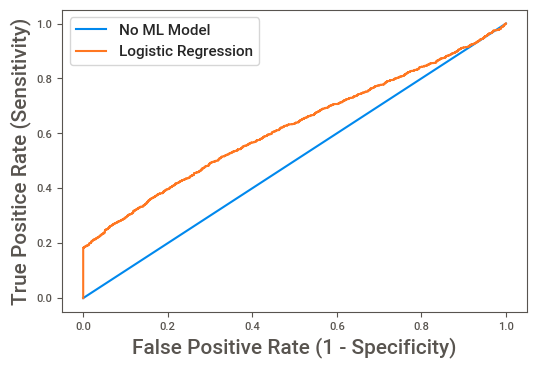

In [ ]:
plot_rocauc([logit_classifier],['Logistic Regression'],X_train,y_train)

### Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
# Parameters for Random Forest Classifier
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
# max depth
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)
criterion = ['gini',"entropy"]
class_weight = [{0:1,1:2},{0:0.8,1:2.5},{0:1,1:2.2},{0:1,1:2.3},{0:1,1:3},{0:1,1:5},{0:1,1:2.8}]

#params = {
#    'estimator__n_estimators':n_estimators,
#    'estimator__max_features':max_features,
#    'estimator__max_depth':max_depth,
#    'estimator__criterion':criterion,
#    'estimator__class_weight':class_weight
#}

params = {    'estimator__n_estimators':n_estimators,
    'estimator__max_features':max_features,
    'estimator__max_depth':max_depth,
    'estimator__criterion':criterion,
    'estimator__max_depth':[int(x) for x in np.linspace(10,500,100)],
    'estimator__min_samples_leaf':[5,10,15,20],
    'estimator__max_leaf_nodes': [30,35,40,45,50]
}

In [ ]:
randomForest_pipeline = Pipeline(
  [("mapper", mapper),
  ("estimator", estimator)]
)

In [ ]:
random_search = RandomizedSearchCV(estimator=randomForest_pipeline, param_distributions=params, n_iter=20, scoring='roc_auc', n_jobs=-1, cv=5, verbose=4, random_state=42)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('mapper',
                                              DataFrameMapper(default=False,
                                                              df_out=False,
                                                              features=[(['Annual '
                                                                          'Income',
                                                                          'Years '
                                                                          'of '
                                                                          'Credit '
                                                                          'History',
                                                                          'Maximum '
                                                                          'Open '
                               

In [ ]:
randomForest_classifier = random_search.best_estimator_

In [ ]:
# Let's check the accuracy of the model
scores = cross_val_score(estimator=randomForest_classifier,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)
print('CV accuracy of Random Forest : %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy of Random Forest : 0.731 +/- 0.005


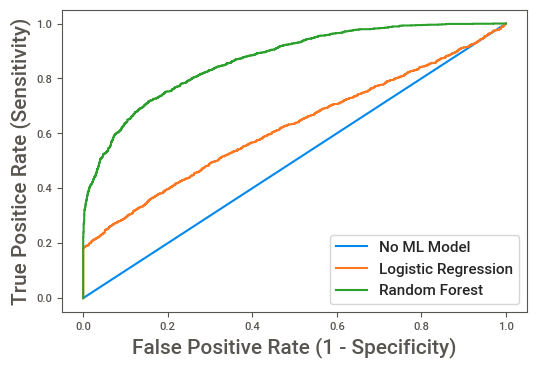

In [ ]:
plot_rocauc([logit_classifier,randomForest_classifier],['Logistic Regression','Random Forest'],X_train,y_train)

### Using Light Gradient Boost Machine (LGBM)

In [ ]:
import lightgbm as lgb

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params ={'estimator__num_leaves': sp_randint(6, 50), 
             'estimator__min_child_samples': sp_randint(100, 500), 
             'estimator__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'estimator__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'estimator__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'estimator__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'estimator__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
estimator = lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=5000)
lgbm_pipeline = Pipeline(
  [("mapper", mapper),
  ("estimator", estimator)]
)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=lgbm_pipeline, param_distributions=params, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=42,
    verbose=True)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('mapper',
                                              DataFrameMapper(default=False,
                                                              df_out=False,
                                                              features=[(['Annual '
                                                                          'Income',
                                                                          'Years '
                                                                          'of '
                                                                          'Credit '
                                                                          'History',
                                                                          'Maximum '
                                                                          'Open '
                               

In [ ]:
lgbm_classifier = random_search.best_estimator_

In [ ]:
# Let's check the accuracy of the model
scores = cross_val_score(estimator=lgbm_classifier,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)
print('CV accuracy of Random Forest : %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy of Random Forest : 0.731 +/- 0.003


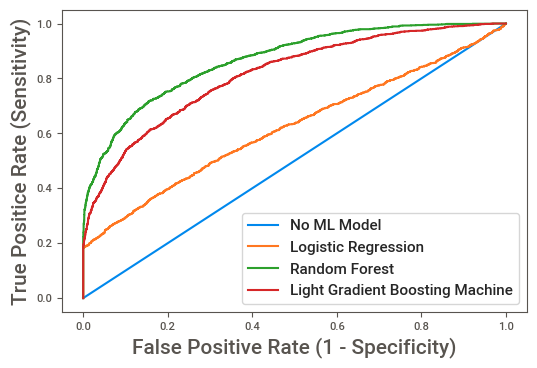

In [ ]:
plot_rocauc([logit_classifier,randomForest_classifier,lgbm_classifier],['Logistic Regression','Random Forest','Light Gradient Boosting Machine'],X_train,y_train)

### Using Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=50)

In [ ]:
params = {
    'estimator__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'estimator__activation': ['tanh', 'relu'],
    'estimator__solver': ['sgd', 'adam'],
    'estimator__alpha': [0.0001, 0.05, 0.002, 0.005],
    'estimator__learning_rate': ['constant','adaptive'],
}

In [ ]:
mlp_pipeline = Pipeline(
  [("mapper", mapper),
  ("estimator", mlp)]
)

In [ ]:
grid_search = GridSearchCV(estimator = mlp_pipeline,param_grid = params, cv = 3, scoring='roc_auc',verbose=4,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  4.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('mapper',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['Annual '
                                                                    'Income',
                                                                    'Years of '
                                                                    'Credit '
                                                                    'History',
                                                                    'Maximum '
                                                                    'Open '
                                                                    'Credit',
                                                                    'Months '
                        

In [ ]:
mlp_classifier = grid_search.best_estimator_

In [ ]:
# Let's check the accuracy of the model
scores = cross_val_score(estimator=mlp_classifier,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=-1)
print('CV accuracy of Random Forest : %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy of Random Forest : 0.724 +/- 0.006


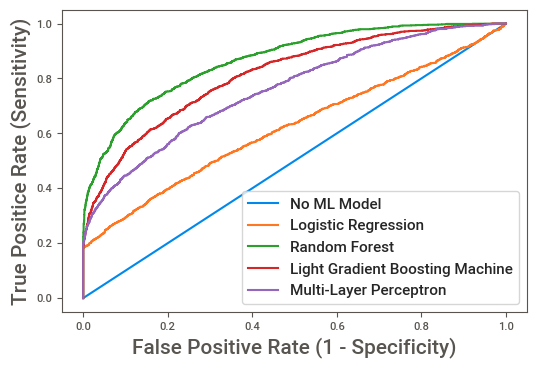

In [ ]:
plot_rocauc([logit_classifier,randomForest_classifier,lgbm_classifier,mlp_classifier],\
            ['Logistic Regression','Random Forest','Light Gradient Boosting Machine','Multi-Layer Perceptron'],X_train,y_train)

## Tuning Accuracy by Handling Imbalance

In [ ]:
import warnings
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
def performHyperTuningAndCrossValidation(models: dict, parameters_list: list, pipelines: list, X: np.ndarray, y: np.ndarray):
    best_models = []

    model_names = list(models.keys())
    for n_neighbors in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
        print(">>> ADASYN n-nieghbors: {}".format(n_neighbors))
        for model, params, pipeline in zip(model_names, parameters_list, pipelines):

            pipeline = imbpipeline(steps=[["mapper", mapper],
                                        ['smote', ADASYN(
                                            random_state=11, n_neighbors=n_neighbors)],
                                        ['classifier', models[model]]])

            print("\t>> Hyper-Tuning Classifier: {}".format(model))
            random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=params,
                                            n_iter=20, scoring='accuracy', n_jobs=-1, cv=3, verbose=0, random_state=42)
            random_search.fit(X, y)
            best_classifier = random_search.best_estimator_
            #best_models[model] = best_classifier
            print("\t>> Hyper-Tuning Done!\n\t\tCross Validating Model: {}".format(model))
            scores = cross_val_score(estimator=best_classifier,
                                    X=X,
                                    y=y,
                                    cv=3,
                                    n_jobs=-1)
            print('\t\tCV accuracy of {} : {:.3f} +/- {:.3f}'.format(model,
                                                                    np.mean(scores), np.std(scores)))
            y_prob = best_classifier.predict_proba(X)[:, 1]
            ROC_AUC_score = roc_auc_score(y, y_prob)

            best_models.append(
                {'Classifier': model,
                    'n_neighbour(ADASYN)': n_neighbors,
                    'Accuracy':  '{:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)),
                    'ROC AUC Score': ROC_AUC_score
                }
            )

    return pd.DataFrame(best_models)


In [ ]:
params_logit = {
    'classifier__penalty':penalty,
    'classifier__C':C,
    'classifier__solver':solver
}

params_randomForest = {
    'classifier__n_estimators':n_estimators,
    'classifier__max_features':max_features,
    'classifier__max_depth':max_depth,
    'classifier__criterion':criterion
}

params_lgbm ={'classifier__num_leaves': sp_randint(6, 50), 
             'classifier__min_child_samples': sp_randint(100, 500), 
             'classifier__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'classifier__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'classifier__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'classifier__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'classifier__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

params_MLP = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05, 0.002, 0.005],
    'classifier__learning_rate': ['constant','adaptive'],
}

parameters = [params_logit,params_randomForest,params_lgbm,params_MLP]


models = {'Logistic Regression':LogisticRegression(random_state=42),'Random Forest':RandomForestClassifier(),\
          'Light Gradient Boosting Machine':lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=5000),\
          'Multi-Layer Perceptron':MLPClassifier(max_iter=50)}

pipelines = [logitRegression_pipeline,randomForest_pipeline,lgbm_pipeline,mlp_pipeline];

best_models = performHyperTuningAndCrossValidation(models,parameters,pipelines,X_train,y_train)

>>> ADASYN n-nieghbors: 2
	>> Hyper-Tuning Classifier: Logistic Regression
	>> Hyper-Tuning Done!
		Cross Validating Model: Logistic Regression
		CV accuracy of Logistic Regression : 0.573 +/- 0.004
	>> Hyper-Tuning Classifier: Random Forest
	>> Hyper-Tuning Done!
		Cross Validating Model: Random Forest
		CV accuracy of Random Forest : 0.679 +/- 0.006
	>> Hyper-Tuning Classifier: Light Gradient Boosting Machine
	>> Hyper-Tuning Done!
		Cross Validating Model: Light Gradient Boosting Machine
		CV accuracy of Light Gradient Boosting Machine : 0.638 +/- 0.006
	>> Hyper-Tuning Classifier: Multi-Layer Perceptron
	>> Hyper-Tuning Done!
		Cross Validating Model: Multi-Layer Perceptron
		CV accuracy of Multi-Layer Perceptron : 0.622 +/- 0.012
>>> ADASYN n-nieghbors: 3
	>> Hyper-Tuning Classifier: Logistic Regression
	>> Hyper-Tuning Done!
		Cross Validating Model: Logistic Regression
		CV accuracy of Logistic Regression : 0.580 +/- 0.004
	>> Hyper-Tuning Classifier: Random Forest
	>> Hyper-Tun

In [ ]:
best_models.to_csv("HyperParameter Tuning on Balanced Model Report.csv")

In [ ]:
best_models['Accuracy_std'] = best_models["Accuracy"].apply(lambda x: x.split(" +/- ")[1])
best_models['Accuracy_mean'] = best_models["Accuracy"].apply(lambda x: x.split(" +/- ")[0])

In [ ]:
def plotErrorBar(neighbors, performance_report_df):
      df = performance_report_df.copy()
      performance_df = df[df['n_neighbour(ADASYN)']==neighbors]
      
      labels = list(performance_df['Classifier'])
      mean_accuracy_df = list(map(float,list(performance_df['Accuracy_mean'])))
      std_accuracy_df = list(map(float,list(performance_df['Accuracy_std'])))

      # Build the plot
      fig, ax = plt.subplots()
      ax.bar(labels, mean_accuracy_df,
            yerr=std_accuracy_df,
            align='center',
            alpha=0.5,
            ecolor='black',
            capsize=10)
      ax.set_ylabel('Corss Validation Accuracy')
      ax.set_xticks([0,1,2,3])
      ax.set_xticklabels(labels,rotation=10)
      ax.set_title("Mean and Standard Deviation of CV Accuracy: ADASYN Neighbours={}".format(neighbors))
      ax.yaxis.grid(True)

      # Save the figure and show
      plt.tight_layout()
      plt.show()


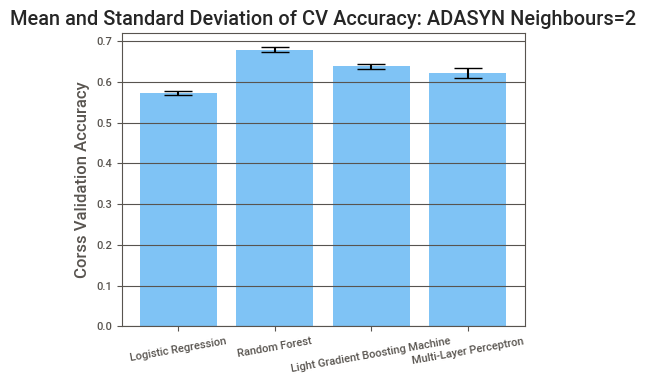

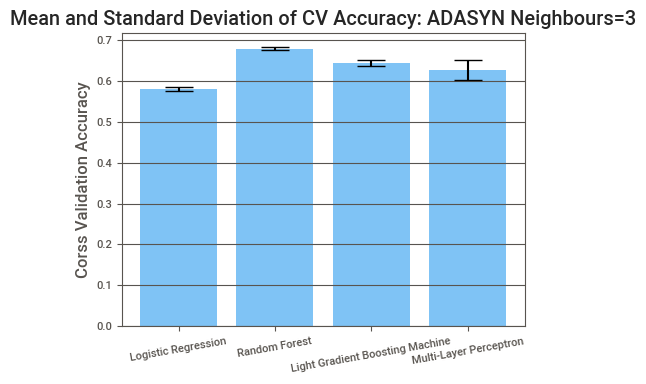

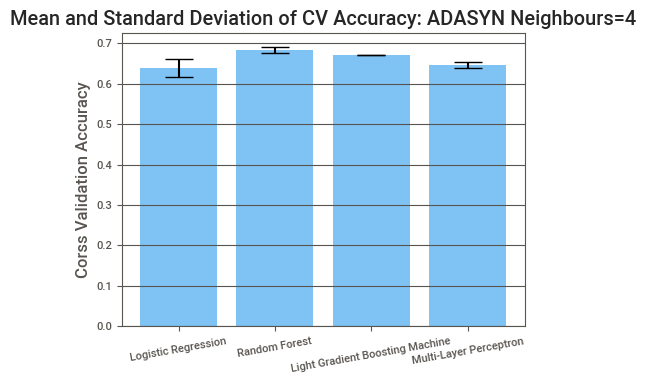

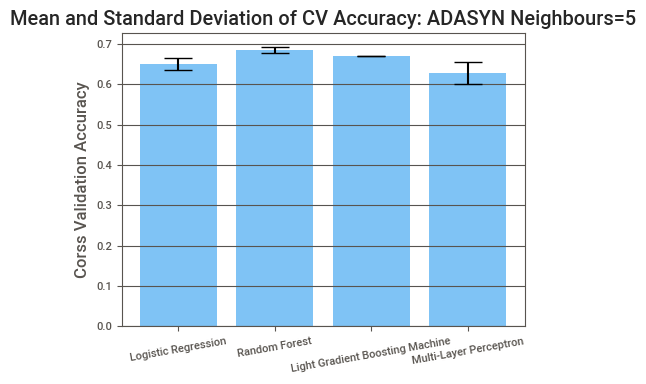

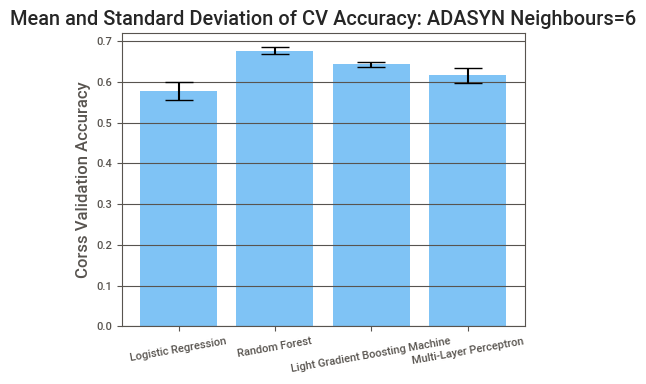

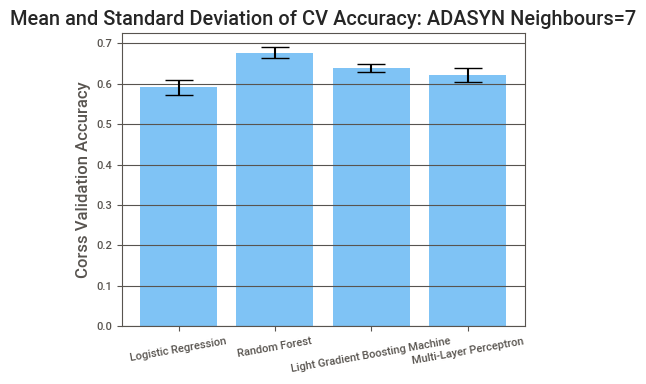

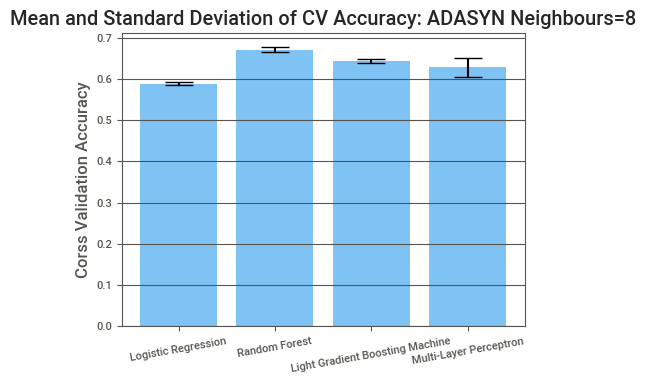

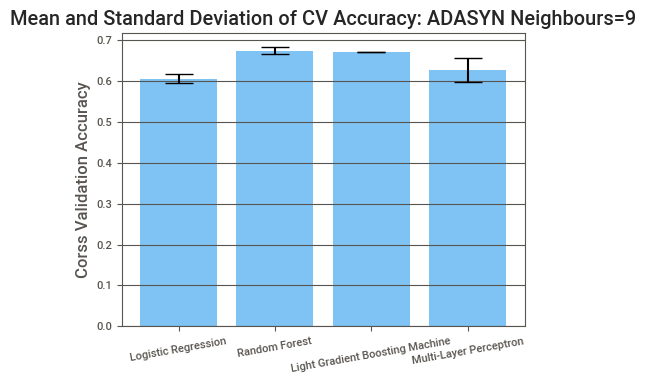

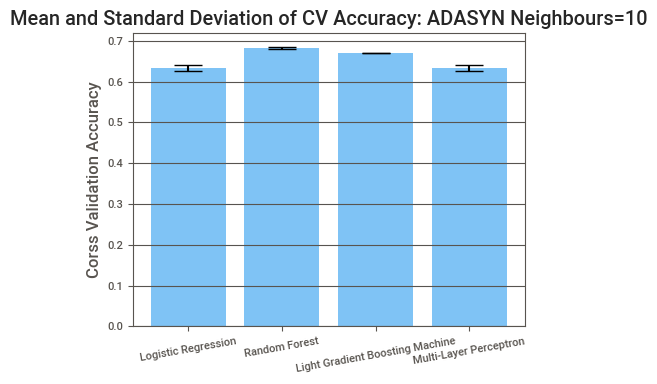

In [ ]:
for n_neighbors in [2,3,4,5,6,7,8,9,10]:
  plotErrorBar(n_neighbors,best_models)

In [ ]:
# Random Forest Classifier trained on Balanced Training Data oversampled by ADASYN
pipeline_rf_balanced = imbpipeline(steps=[["mapper", mapper],\
                                        ['smote', ADASYN(random_state=11, n_neighbors=5)],\
                                        ['classifier', RandomForestClassifier()]])

params_randomForest = {
    'classifier__n_estimators':n_estimators,
    'classifier__max_features':max_features,
    'classifier__max_depth':max_depth,
    'classifier__criterion':criterion,
    'classifier__max_depth':[int(x) for x in np.linspace(10,500,100)],
    'classifier__min_samples_leaf':[5,10,15],
    'classifier__max_leaf_nodes': [30,35,40,45,50,55,65]
}
            
random_search = RandomizedSearchCV(estimator=pipeline_rf_balanced, param_distributions=params_randomForest,
                                n_iter=20, scoring='roc_auc', n_jobs=-1, cv=5, verbose=0, random_state=42)
random_search.fit(X, y)
randomForest_classifier_balanced = random_search.best_estimator_

In [ ]:
# Light Gradient Boosting Classifier trained on Balanced Training Data oversampled by ADASYN
pipeline_lgbm_balanced = imbpipeline(steps=[["mapper", mapper],\
                                        ['smote', ADASYN(random_state=11, n_neighbors=5)],\
                                        ['classifier', lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=5000)]])

            
random_search = RandomizedSearchCV(estimator=pipeline_lgbm_balanced, param_distributions=params_lgbm,
                                n_iter=20, scoring='roc_auc', n_jobs=-1, cv=5, verbose=0, random_state=42)
random_search.fit(X, y)
lgbm_classifier_balanced = random_search.best_estimator_

In [ ]:
randomForest_classifier_balanced.score(X_test,y_test)

0.7975746268656716

In [ ]:
lgbm_classifier_balanced.score(X_test,y_test)

0.7042910447761194

## Evaluating the Model

In [ ]:
!pip install --upgrade mlxtend

In [ ]:
from sklearn import metrics
from yellowbrick.classifier import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

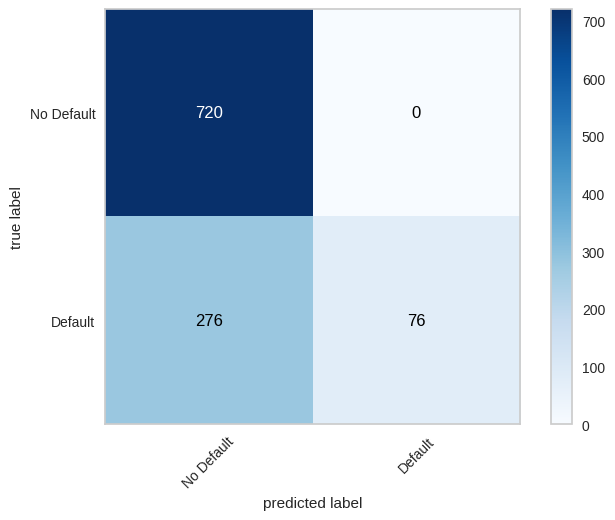

In [ ]:
y_pred_rf = randomForest_classifier.predict(X_test)
class_names = ['No Default','Default']

fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_pred_rf),
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True,class_names=class_names)

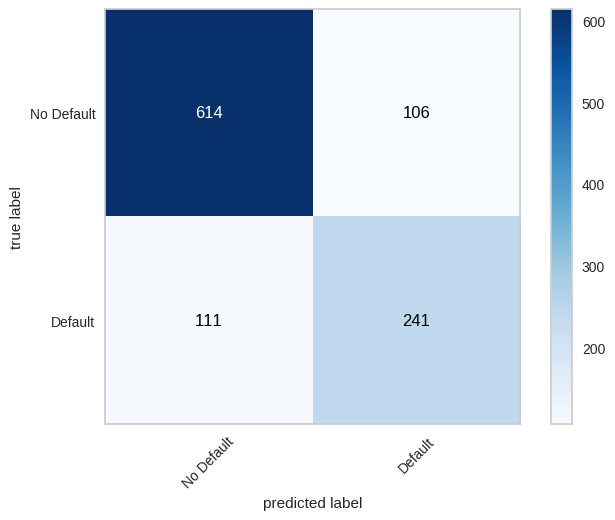

In [ ]:
y_pred_rf_balanced = randomForest_classifier_balanced.predict(X_test)
class_names = ['No Default','Default']

fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_pred_rf_balanced),
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True,class_names=class_names)

In [ ]:
y_pred = randomForest_classifier_balanced.predict(X_test)
y_prob = randomForest_classifier_balanced.predict_proba(X_test)[:,1] # Probability of Default

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

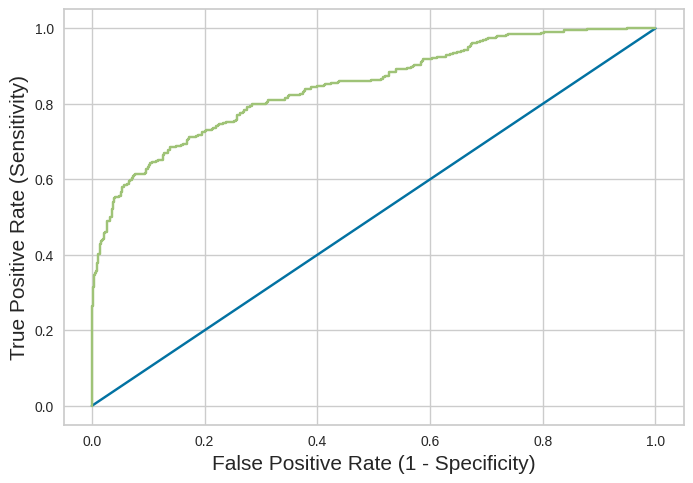

In [ ]:
y_pred_noML = np.zeros(len(y_test))
fpr_noML,tpr_noML,thresholds_noML = roc_curve(y_test,y_pred_noML)
plt.plot(fpr_noML,tpr_noML,label='No ML Model')

fpr_rf_balanced, tpr_rf_balanced, thresholds_rf_balanced = roc_curve(y_test,y_prob)
plt.plot(fpr_rf_balanced,tpr_rf_balanced,label="Random Forest [on over-sampled Data]")

plt.xlabel('False Positive Rate (1 - Specificity)',size=15)
plt.ylabel('True Positive Rate (Sensitivity)',size=15)

In [ ]:
report = metrics.classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()
classification_report_df

,precision,recall,f1-score,support
0,0.846897,0.852778,0.849827,720.000000
1,0.694524,0.684659,0.689557,352.000000
accuracy,0.797575,0.797575,0.797575,0.797575
macro avg,0.770711,0.768718,0.769692,1072.000000
weighted avg,0.796864,0.797575,0.797201,1072.000000


In [ ]:
# Selecting threshold for increasing Recall, i.e., Model's ability to increase the detection of Defaults
optimal_idx = np.argmax(tpr_rf_balanced - fpr_rf_balanced)
optimal_threshold = thresholds_rf_balanced[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.5014187139109867


In [ ]:
y_pred_new_thresh = np.where(y_prob>optimal_threshold,1,0)

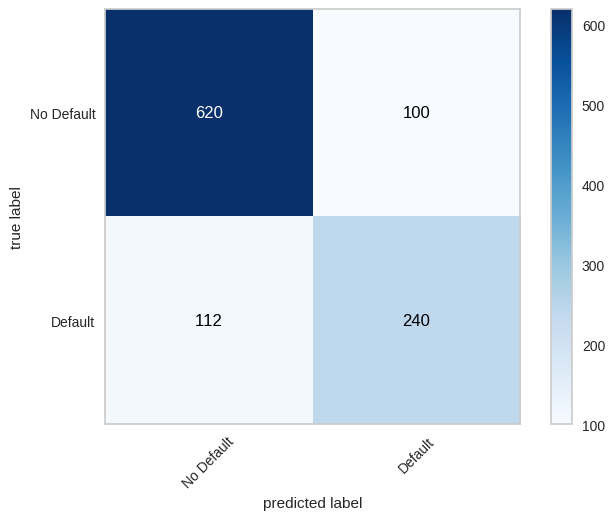

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test,y_pred_new_thresh),
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True,class_names=class_names)

In [ ]:
report_new = metrics.classification_report(y_test, y_pred_new_thresh, output_dict=True)
classification_report_df_new = pd.DataFrame(report).transpose()
classification_report_df_new

,precision,recall,f1-score,support
0,0.846897,0.852778,0.849827,720.000000
1,0.694524,0.684659,0.689557,352.000000
accuracy,0.797575,0.797575,0.797575,0.797575
macro avg,0.770711,0.768718,0.769692,1072.000000
weighted avg,0.796864,0.797575,0.797201,1072.000000


## Saving the Model

In [ ]:
import joblib

In [ ]:
# save the model to disk
filename = 'PD_model_randomForest.sav'
joblib.dump(randomForest_classifier_balanced, filename)

['PD_model_randomForest.sav']